In [1]:
import json
import numpy as np

In [2]:
MODELS = ["Mistral-7B-Instruct-v0.2", "Mixtral-8x7B-Instruct-v0_1-AQLM-2Bit-1x16-hf", "Meta-Llama-3-8B-Instruct", "Meta-Llama-3-70B-Instruct-AQLM-2Bit-1x16", "rc", "GigaChat", "yandexgpt", "GigaChat-Pro", "gpt-3.5-turbo", "gpt-4-turbo"]
ORDER = [4, 5, 0, 3, 2, 6, 8, 1, 9, 7]
MODEL = MODELS[ORDER[9]]

# MODEL = "yandexgpt"


SEMINAR = "12"
FILENAME = f"../data/ru/{MODEL}/{SEMINAR}.json"

with open(FILENAME, "r") as f:
    gens = json.load(f)

In [3]:
scores = []

In [4]:
from time import sleep
from IPython.display import clear_output

for gen in gens[len(scores):]:
    clear_output(wait=True)
    sleep(0.1)
    
    # print the gen
    print(gen['reasoning'])
    print(gen["topic"])
    input(prompt="Press Enter to continue")
    
    # LEGIBLE
    legible = int(input(prompt="generation is a valid question from a linguastic standpoint"))
    
    # RELEVANT
    relevant = int(input(prompt="generation is relevant to the topic"))
    
    # INDEPENDET
    independent = int(input(prompt="question makes sense without the context"))
    
    # SENSIBLE
    sensible = int(input(prompt="question is a valid question with regard to the material"))
    
    # CORRECT ANSWER
    correct_answer = int(input(prompt="correct answer is present"))
    
    # incorrect options
    incorrect_options = int(input(prompt="all the other options are incorrect"))
    
    scores.append({
        "valid": gen["valid"],
        "legible": legible,
        "relevant": relevant,
        "independent": independent,
        "sensible": sensible,
        "answerable": correct_answer,
        "certain": incorrect_options,
    })


Шаг 1: Ключевые формулы и идеи
- Условное математическое ожидание: $\mathbb{E}[\xi|D](\omega)=\sum_{i=1}^{m}x_{i}\mathbb{P}\{A_{i}|D\}(\omega)$.
- Тождество Вальда: $E[\eta]=E[\xi_1 \cdot N] = E[\xi_1]\cdot E[N]$.

Шаг 2: Предложение вопроса
Вопрос: Верно ли утверждение о том, что условное математическое ожидание произведения двух независимых случайных величин равно произведению их условных математических ожиданий?

Шаг 3: Правильный ответ
Нет, это утверждение неверно.

Шаг 4: Неправильные ответы
- Да, это верно всегда. (Это неверно, потому что условное математическое ожидание не сохраняет свойств линейности для произведений независимых случайных величин.)
- Нет, это верно только при определенных условиях. (Это неверно, потому что условное математическое ожидание не сохраняет свойств линейности для произведений независимых случайных величин вообще, даже при некоторых дополнительных условиях.)

Шаг 5: Окончательная формулировка
```yaml
question: Верно ли утверждение о том, что условное 

 - $\mathbb{E}\xi_{1}$
 - $\mathbb{E}\xi_{1}\cdot\mathbb{E}N^2$
 - $\mathbb{E}N$
 - $\mathbb{E}\xi_{1}+\mathbb{E}N$

In [9]:
keys = scores[0].keys()

for key in sorted(keys):
    print(f"{key}: {sum(int(score[key]) for score in scores)}")

with open(FILENAME[:FILENAME.rfind(".")] + "_metrics.json", "w") as f:
    json.dump(scores, f, indent=4)

answerable: 1
certain: 1
independent: 10
legible: 10
relevant: 6
sensible: 7
valid: 7


/tmp/ipykernel_2262765/3810232133.py:127: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


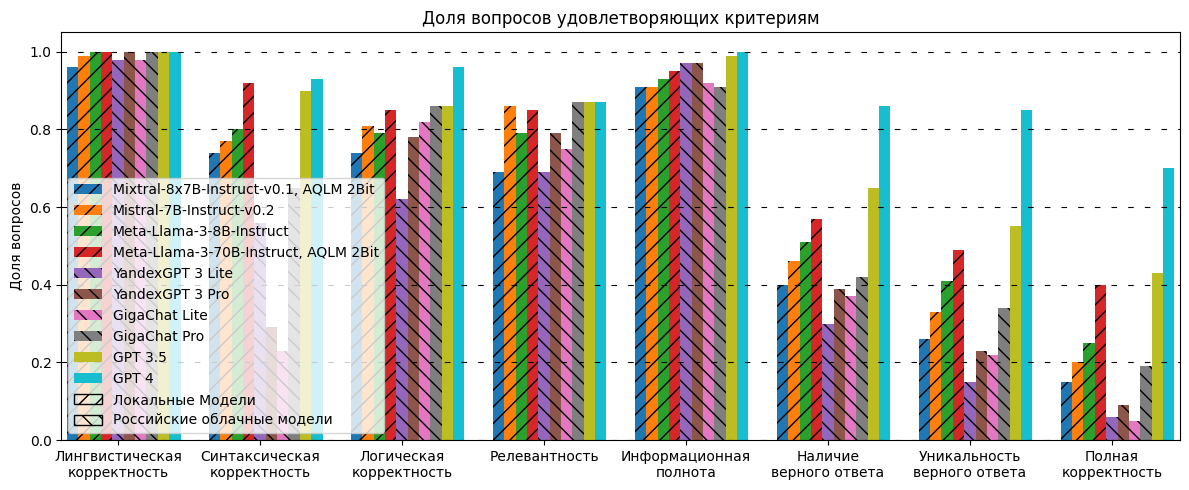

In [35]:
import json

MODELS = [
    "Mixtral-8x7B-Instruct-v0_1-AQLM-2Bit-1x16-hf",
    "Mistral-7B-Instruct-v0.2",
    "Meta-Llama-3-8B-Instruct",
    "Meta-Llama-3-70B-Instruct-AQLM-2Bit-1x16",
    "rc",
    "yandexgpt",
    "GigaChat",
    "GigaChat-Pro",
    "gpt-3.5-turbo",
    "gpt-4-turbo",
]
LOCAL = [True] * 4 + [False] * 6
RUSSIAN = [False] * 4 + [True] * 4 + [False] * 2
SEMINARS = ["1", "2", "3_4", "5", "6", "8", "9", "10", "11", "12"][:10]

# plot the scores for each model for each seminar as a bar plot
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14, 6]

import matplotlib.pyplot as plt
import numpy as np

model_aliases = {
    "Mixtral-8x7B-Instruct-v0_1-AQLM-2Bit-1x16-hf": "Mixtral-8x7B-Instruct-v0.1, AQLM 2Bit",
    "Mistral-7B-Instruct-v0.2": "Mistral-7B-Instruct-v0.2",
    "Meta-Llama-3-8B-Instruct": "Meta-Llama-3-8B-Instruct",
    "Meta-Llama-3-70B-Instruct-AQLM-2Bit-1x16": "Meta-Llama-3-70B-Instruct, AQLM 2Bit",
    "GigaChat": "GigaChat Lite",
    "yandexgpt": "YandexGPT 3 Pro",
    "rc": "YandexGPT 3 Lite",
    "GigaChat-Pro": "GigaChat Pro",
    "gpt-3.5-turbo": "GPT 3.5",
    "gpt-4-turbo": "GPT 4"
}


species = [
        "legible",
        "valid",
        "sensible",
        "relevant",
        "independent",
        "answerable",
        "certain",
]

FULL_CORRECTNESSES = {model: [] for model in MODELS}

x = np.arange(len(species) + 1)  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 5))


for model, local, russian in zip(MODELS, LOCAL, RUSSIAN):
    measurements = [0 for _ in range(len(species) + 1)]
    for seminar in SEMINARS:
        with open(f"../data/ru/{model}/{seminar}_metrics.json", "r") as f:
            saved_scores = json.load(f)
        for score in saved_scores:
            for i, key in enumerate(species):
                measurements[i] += score[key]
                if score[key] not in [0, 1]:
                    raise Exception()
            full_correctness = np.prod([score[key] for key in species])
            measurements[-1] += full_correctness
            FULL_CORRECTNESSES[model].append(full_correctness)
    
    measurements = [m / len(SEMINARS) / 10 for m in measurements]
    
    offset = width * multiplier
    
    if local:
        hatch='//'
    elif russian:
        hatch=r'\\'
    else:
        hatch=None
    
    rects = ax.bar(x + offset, measurements, width, label=model_aliases[model], hatch=hatch)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    
# for pos in x:
#     plt.axvline(pos + 3.5 * width, linestyle="--", color="black")
    
ax.set_xlim(-width, width * len(MODELS) + width * 87.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Доля вопросов')
ax.set_title('Доля вопросов удовлетворяющих критериям')

ax.set_xticks(x + 4 * width, [
    "Лингвистическая\nкорректность",
    "Синтаксическая\nкорректность",
    "Логическая\nкорректность",
    "Релевантность",
    "Информационная\nполнота",
    "Наличие\nверного ответа",
    "Уникальность\nверного ответа",
    "Полная\nкорректность"
])
ax.grid(axis='y', color="black", linestyle=(0, (5, 10)))

lgd = ax.legend(loc='lower left')
def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor=(0, 0, 0, 0), hatch='//', edgecolor='black'))
    labels.append("Локальные Модели")
    handles.append(Patch(facecolor=(0, 0, 0, 0), hatch=r'\\', edgecolor='black'))
    labels.append("Российские облачные модели")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())
add_patch(lgd)


plt.tight_layout()
plt.show()


In [36]:
fig.savefig("./comparison.pdf")

In [37]:
for model, full_correctnesses in FULL_CORRECTNESSES.items():
    full_correctnesses = np.array(full_correctnesses)
    mean = full_correctnesses.mean()
    error = np.sqrt(mean * (1 - mean) / len(full_correctnesses))
    
    
    print(f"{model_aliases[model]}: ${mean:.2f}\\pm{error:.2f}$")

Mixtral-8x7B-Instruct-v0.1, AQLM 2Bit: $0.15\pm0.04$
Mistral-7B-Instruct-v0.2: $0.20\pm0.04$
Meta-Llama-3-8B-Instruct: $0.25\pm0.04$
Meta-Llama-3-70B-Instruct, AQLM 2Bit: $0.40\pm0.05$
YandexGPT 3 Lite: $0.06\pm0.02$
YandexGPT 3 Pro: $0.09\pm0.03$
GigaChat Lite: $0.05\pm0.02$
GigaChat Pro: $0.19\pm0.04$
GPT 3.5: $0.43\pm0.05$
GPT 4: $0.70\pm0.05$
